# Two states and multiplicity

This notebook uses the code in "two_states_discrete_time.jl" to run several numerical simulations of a version of the Eaton-Gersovitz model in discrete time with two possible realization of the a outside option shock, as well as concave utility (in what follows, log). 

The simulation relies on a primal representation of equilibrium.

In [36]:
include("two_states_long_bond.jl");

In [37]:
m = TwoStatesModel()

R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.25 y=1.0 points=10001

In [38]:
bor = create_bor_eqm(m)
sav = create_sav_eqm(m)
hyb = create_hyb_eqm(m);

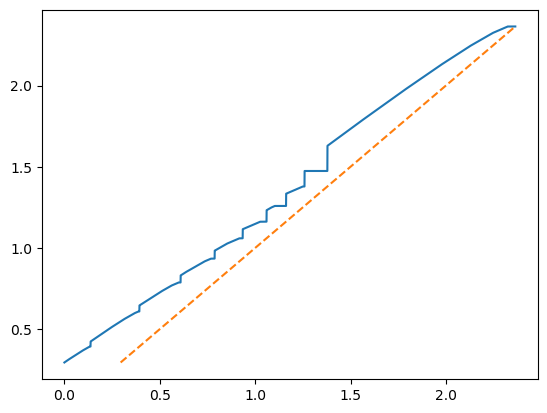

In [39]:
plot_pol(bor);

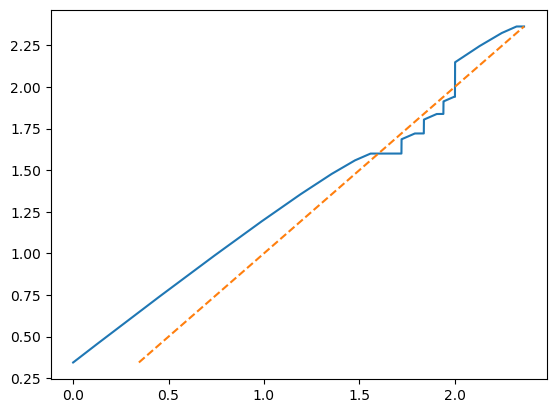

In [40]:
plot_pol(sav);

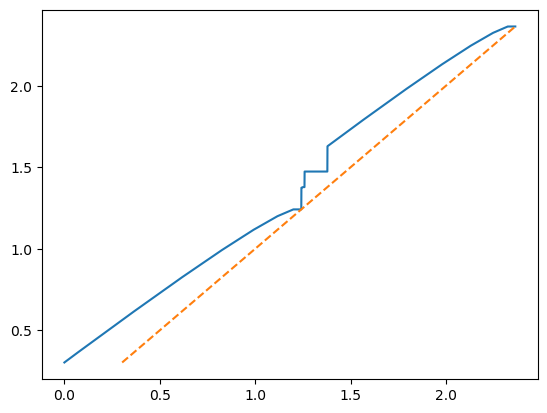

In [41]:
plot_pol(hyb);

## Checking the accuracy of the constructions

In [42]:
a_tmp = Alloc(m);

In [43]:
for x in [bor, sav, hyb]
    iterate_v_and_pol!(a_tmp, x)
    println(maximum(abs.(a_tmp.v .- x.v)))
end

2.220446049250313e-16
2.220446049250313e-16
2.6150369531019457e-5


The savings and the borrowing are indeed equilibrium. 
The hybrid is not an equilibrium in discrete time. 

## Iterating backwards

Iter 10. Distance=0.9010179849661519
Iter 20. Distance=0.9410852351273012
Iter 30. Distance=0.929634008586049
Iter 40. Distance=0.9233698650294618
Iter 50. Distance=0.9203683040455536
Iter 60. Distance=0.9189419090406775
Iter 70. Distance=0.9182628641558037
Iter 80. Distance=0.9179378740661646
Iter 90. Distance=0.9177869721692055
Iter 100. Distance=0.02542606252498303
Iter 110. Distance=0.025264300932319905
Iter 120. Distance=0.01953812070126071
Iter 130. Distance=0.025093242383731784
Iter 140. Distance=0.025056314642197486
Iter 150. Distance=3.4665474723527545e-5
Iter 160. Distance=0.019374416451885534
Iter 170. Distance=1.4052288841659433e-5
Iter 180. Distance=5.472187771693449e-6
Iter 190. Distance=2.1309581198503125e-6
Iter 200. Distance=0.012163472106624162
Iter 210. Distance=4.01102538410969e-6
Iter 220. Distance=1.5619579351033863e-6
Iter 230. Distance=6.082515959793255e-7
Iter 240. Distance=2.3686297556668734e-7
Iter 250. Distance=9.223826069604257e-8
Iter 260. Distance=3.59190

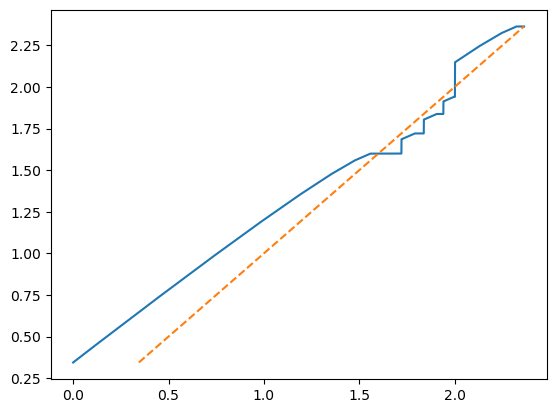

Iter 360. Distance=2.880806704297356e-12
Iter 370. Distance=1.12207465541303e-12
Converged.


In [31]:
iter_out = iterate_backwards(m)
plot_pol(iter_out);

In this case we have converged to the savings equilibrium.

## Another parameter specification

In [32]:
m = TwoStatesModel(R=1.05, β=0.92, δ=0.10, npoints_approx=20000)

R=1.05 β=0.92 τH=0.15 τL=0.08 λ=0.025 δ=0.1 y=1.0 points=20001

In [33]:
bor = create_bor_eqm(m)
sav = create_sav_eqm(m)
hyb = create_hyb_eqm(m);

In [34]:
iter_out = iterate_backwards(m)

Iter 10. Distance=0.7188905394022551
Iter 20. Distance=0.8254565602620448
Iter 30. Distance=0.8506699877924698
Iter 40. Distance=0.8514445259203092
Iter 50. Distance=0.8499299974643371
Iter 60. Distance=0.8488926755481255
Iter 70. Distance=0.8483451083735261
Iter 80. Distance=0.848075741524153
Iter 90. Distance=0.08942684264729162
Iter 100. Distance=0.07457457735176354
Iter 110. Distance=0.07443563715799995
Iter 120. Distance=0.07435554334971928
Iter 130. Distance=0.07430857329420693
Iter 140. Distance=0.0742983523568399
Iter 150. Distance=0.07423094908601868
Iter 160. Distance=0.07424428670539707
Iter 170. Distance=0.0742369909310191
Iter 180. Distance=5.718109168606489e-6
Iter 190. Distance=0.014603794536565129
Iter 200. Distance=2.147450944567364e-6
Iter 210. Distance=9.328278983145033e-7
Iter 220. Distance=4.052096696516294e-7
Iter 230. Distance=1.7601840229808374e-7
Iter 240. Distance=7.64603617642301e-8
Iter 250. Distance=3.321349861806766e-8
Iter 260. Distance=1.442756059066852e

Alloc for model: R=1.05 β=0.92 τH=0.15 τL=0.08 λ=0.025 δ=0.1 y=1.0 points=20001

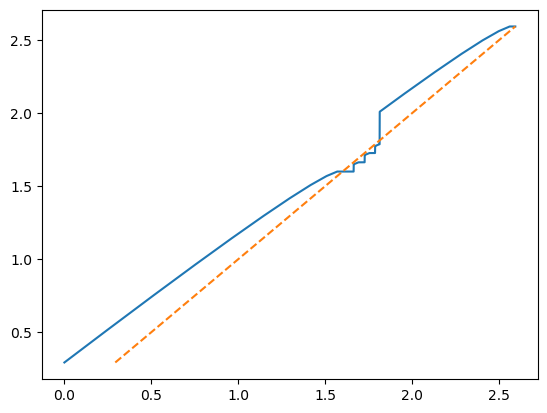

In [35]:
plot_pol(iter_out);

## A note on the hybrid

In [45]:
m = TwoStatesModel(β=exp(-0.1), R=exp(.06))

bor = create_bor_eqm(m)
sav = create_sav_eqm(m)
hyb = create_hyb_eqm(m)

a_tmp = Alloc(m)

for x in [bor, sav, hyb]
    iterate_v_and_pol!(a_tmp, x)
    println(maximum(abs.(a_tmp.v .- x.v)))
end

2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16


For this parameterization, the hybrid seems to be an equilibrium. 